# CONVOLUTIONAL NEURAL NETWORK NB (CNN-First on DL)  

## libraries and env configuration 


In [1]:
#packages from tensor flow
import tensorflow as Tf

# tensor flow for optimizing the model 


# basis packages 
import os as os 
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import ssl

In [2]:
physicalDevice = Tf.config.experimental.list_physical_devices('GPU')
Tf.config.experimental.set_memory_growth(physicalDevice[0], True)
print("Num GPUs Available and used :  ", len(physicalDevice))


Num GPUs Available and used :   1


In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2' # Suppress TensorFlow logging (1)	

## data preprocessing 

In [4]:
# Load MNIST dataset
(xTrainMnist,yTrainMnist),(xTestMnist,yTestMnist)=Tf.keras.datasets.mnist.load_data()

### normalization 

In [5]:
xTrainMnist.max()

255

In [6]:
xTestMnist.max()


255

In [7]:
#xTestMnist = xTestMnist.astype('float32') / 255 

#### changing normalization for data train: 

In [8]:
# we normalize tghe data lessing the mean and the standar deviation to xtrain data in order to have a better performance on the training process 

MnistMean = xTrainMnist.mean()
MnistStd = xTrainMnist.std()

# normalize the data dividing by the sd assecuring the none zero value of the sd

xTrainMnist = (xTrainMnist-MnistMean)/(MnistStd+1e-7)

# also normalize the test data using mean and std from training data cause the idea is that the network doesnt know these parameters of the test set

xTestMnist = (xTestMnist - MnistMean)/(MnistStd+1e-7)

""" also could use : 
mean = np.mean(xTrainMnist)
print(mean)
"""

' also could use : \nmean = np.mean(xTrainMnist)\nprint(mean)\n'

### split train data

In [9]:
xTrainMnist, xValidMnist = xTrainMnist[5000:],xTrainMnist[:5000]
yTrainMnist, yValidMnist = yTrainMnist[5000:],yTrainMnist[:5000]

look dimension size

In [10]:
xTrainMnist.shape, yTrainMnist.shape, xValidMnist.shape, yValidMnist.shape , xTestMnist.shape, yTestMnist.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

### data argumentation for best performance

In [11]:
datagen = Tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
    )

### see number of classes/labels in order to binarize 

In [12]:
len(np.unique(yTrainMnist)) # 10 classes

10

####  binarizing the labels in order to use only categorical cross entropy without sparse 


In [13]:
yTrainMnist = Tf.keras.utils.to_categorical(yTrainMnist,num_classes=10)
yTestMnist = Tf.keras.utils.to_categorical(yTestMnist, num_classes= 10)
yValidMnist = Tf.keras.utils.to_categorical(yValidMnist, num_classes=10)


In [14]:
yTrainMnist[0] # one hot encoding of the labels

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [15]:
print(yTrainMnist[0:10]) # display the first 10 labels of the training set
print(yTestMnist[0:10]) # display the first 10 labels of the test set

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
xTrainMnist.shape, yTrainMnist.shape, xTestMnist.shape, yTestMnist.shape

((55000, 28, 28), (55000, 10), (10000, 28, 28), (10000, 10))

## creating another structure for the sequential model 

proceed to use a kernel recognition filter on every layer, besides of another techniques to avoid overfitting: 

- dropout
- batch normalization 
- flatten 
- global average pooling
- regularizacion l1 o l2
- estructura de hyperparámetros
- funciones de activacion 
- (PRUNNING & SPARSITY ¿?) 
    * Función: Eliminan conexiones o neuronas innecesarias en la red, reduciendo la complejidad del modelo y mejorando la eficiencia computacional.​

    * Implementación: Se aplican después del entrenamiento inicial para identificar y eliminar pesos insignificantes.

In [17]:
KernelBase = 32 
WeightRegularizer = 1e-4 

In [18]:
MnistModel = Tf.keras.models.Sequential() 

making layer by layer 
First one is a convolutional sequence of layers : 


In [19]:
MnistModel.add(Tf.keras.layers.Conv2D(KernelBase, (3,3), padding = 'same', input_shape=(28,28,1), kernel_regularizer = Tf.keras.regularizers.l2(WeightRegularizer)))

once we add the first convolutional layer with 32 filters of size 3x3 and a regularization term to avoid overfitting
proceed adding the activation function ReLU to the output of the convolutional layer

In [20]:
MnistModel.add(Tf.keras.layers.Activation('relu'))


 finally goes with the batch normalization to normalize the output of the previous layer


In [21]:
MnistModel.add(Tf.keras.layers.BatchNormalization())

also implement a maxpooling 2d layer and dropout on this another layer : 


In [22]:
MnistModel.add(Tf.keras.layers.Conv2D(KernelBase, (3, 3), padding='same', activation='relu', kernel_regularizer=Tf.keras.regularizers.l2(WeightRegularizer), input_shape=(28, 28, 1)))
MnistModel.add(Tf.keras.layers.LeakyReLU(alpha=0.1)) # we use a different activation function to see if it improves the performance of the model
MnistModel.add(Tf.keras.layers.BatchNormalization())
MnistModel.add(Tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')) 
MnistModel.add(Tf.keras.layers.Dropout(0.25)) # we add a dropout layer to reduce overfitting 

now, we nee to do the last classification layer with a dense and a flatten function 

In [23]:
# Add a Flatten layer to convert the 2D images to 1D vectors  (transform the img to an array)
MnistModel.add(Tf.keras.layers.Flatten()) # without the input size 

finally,  10 classes for the output layer with a softmax activation

In [24]:
MnistModel.add(Tf.keras.layers.Dense(10,activation= 'softmax'))  

lets see a summary of the structure: 

In [25]:
MnistModel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                        

proceed compiling the model 


In [26]:
MnistModel.compile(optimizer=Tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # we use adam optimizer with a learning rate of 0.001 and categorical cross entropy as loss function
# use addam optimizer with a learning rate of 0.001 and categorical cross entropy as loss function

also we can do a callback checkpoint when were we are fitting the model 

In [27]:
CBCheckPoint = Tf.keras.callbacks.ModelCheckpoint("best_model,keras", verbose = 1, save_best_only = True, monitor = "val_accuracy")

### proceding training the model 

In [28]:

# Asegúrate de que los datos tengan 4 dimensiones
xTrainMnist = np.expand_dims(xTrainMnist, axis=-1)  # Agrega la dimensión del canal
xValidMnist = np.expand_dims(xValidMnist, axis=-1)  # Agrega la dimensión del canal

In [29]:
MnistHistory = MnistModel.fit(
    datagen.flow(xTrainMnist, yTrainMnist, batch_size=128), 
    epochs=1000, 
    validation_data=(xValidMnist, yValidMnist), 
    callbacks=[CBCheckPoint], 
    verbose=2, 
    steps_per_epoch=xTrainMnist.shape[0] // 128
)

Epoch 1/1000

Epoch 1: val_accuracy improved from -inf to 0.66080, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 42s - loss: 1.2438 - accuracy: 0.6089 - val_loss: 0.9951 - val_accuracy: 0.6608 - 42s/epoch - 99ms/step
Epoch 2/1000

Epoch 2: val_accuracy improved from 0.66080 to 0.80460, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 19s - loss: 0.8163 - accuracy: 0.7326 - val_loss: 0.5972 - val_accuracy: 0.8046 - 19s/epoch - 45ms/step
Epoch 3/1000

Epoch 3: val_accuracy improved from 0.80460 to 0.83600, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 19s - loss: 0.6719 - accuracy: 0.7763 - val_loss: 0.4899 - val_accuracy: 0.8360 - 19s/epoch - 45ms/step
Epoch 4/1000

Epoch 4: val_accuracy did not improve from 0.83600
429/429 - 17s - loss: 0.5873 - accuracy: 0.8041 - val_loss: 0.5614 - val_accuracy: 0.8336 - 17s/epoch - 40ms/step
Epoch 5/1000

Epoch 5: val_accuracy improved from 0.83600 to 0.83860, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.5317 - accuracy: 0.8229 - val_loss: 0.5140 - val_accuracy: 0.8386 - 18s/epoch - 42ms/step
Epoch 6/1000

Epoch 6: val_accuracy improved from 0.83860 to 0.88880, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 19s - loss: 0.4998 - accuracy: 0.8334 - val_loss: 0.3479 - val_accuracy: 0.8888 - 19s/epoch - 44ms/step
Epoch 7/1000

Epoch 7: val_accuracy did not improve from 0.88880
429/429 - 19s - loss: 0.4756 - accuracy: 0.8427 - val_loss: 0.3822 - val_accuracy: 0.8802 - 19s/epoch - 45ms/step
Epoch 8/1000

Epoch 8: val_accuracy improved from 0.88880 to 0.89540, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 23s - loss: 0.4426 - accuracy: 0.8541 - val_loss: 0.3593 - val_accuracy: 0.8954 - 23s/epoch - 54ms/step
Epoch 9/1000

Epoch 9: val_accuracy did not improve from 0.89540
429/429 - 24s - loss: 0.4398 - accuracy: 0.8555 - val_loss: 0.3391 - val_accuracy: 0.8888 - 24s/epoch - 55ms/step
Epoch 10/1000

Epoch 10: val_accuracy improved from 0.89540 to 0.90560, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 27s - loss: 0.4178 - accuracy: 0.8613 - val_loss: 0.2931 - val_accuracy: 0.9056 - 27s/epoch - 63ms/step
Epoch 11/1000

Epoch 11: val_accuracy did not improve from 0.90560
429/429 - 23s - loss: 0.4142 - accuracy: 0.8623 - val_loss: 0.3101 - val_accuracy: 0.9000 - 23s/epoch - 55ms/step
Epoch 12/1000

Epoch 12: val_accuracy did not improve from 0.90560
429/429 - 19s - loss: 0.3999 - accuracy: 0.8681 - val_loss: 0.3090 - val_accuracy: 0.9028 - 19s/epoch - 44ms/step
Epoch 13/1000

Epoch 13: val_accuracy improved from 0.90560 to 0.91800, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 27s - loss: 0.3905 - accuracy: 0.8726 - val_loss: 0.2773 - val_accuracy: 0.9180 - 27s/epoch - 62ms/step
Epoch 14/1000

Epoch 14: val_accuracy improved from 0.91800 to 0.92120, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 21s - loss: 0.3915 - accuracy: 0.8718 - val_loss: 0.2568 - val_accuracy: 0.9212 - 21s/epoch - 50ms/step
Epoch 15/1000

Epoch 15: val_accuracy did not improve from 0.92120
429/429 - 17s - loss: 0.3782 - accuracy: 0.8764 - val_loss: 0.2782 - val_accuracy: 0.9170 - 17s/epoch - 40ms/step
Epoch 16/1000

Epoch 16: val_accuracy did not improve from 0.92120
429/429 - 16s - loss: 0.3764 - accuracy: 0.8774 - val_loss: 0.2974 - val_accuracy: 0.9118 - 16s/epoch - 38ms/step
Epoch 17/1000

Epoch 17: val_accuracy did not improve from 0.92120
429/429 - 16s - loss: 0.3750 - accuracy: 0.8789 - val_loss: 0.2636 - val_accuracy: 0.9160 - 16s/epoch - 38ms/step
Epoch 18/1000

Epoch 18: val_accuracy did not improve from 0.92120
429/429 - 16s - loss: 0.3642 - accuracy: 0.8803 - val_loss: 0.2891 - val_accuracy: 0.9066 - 16s/epoch - 38ms/step
Epoch 19/1000

Epoch 19: val_accuracy did not improve from 0.92120
429/429 - 16s - loss: 0.3597 - accuracy: 0.8798 - val_loss: 0.2792 - val_accuracy: 0.9050 - 16s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.3584 - accuracy: 0.8835 - val_loss: 0.2381 - val_accuracy: 0.9304 - 18s/epoch - 43ms/step
Epoch 22/1000

Epoch 22: val_accuracy did not improve from 0.93040
429/429 - 17s - loss: 0.3523 - accuracy: 0.8855 - val_loss: 0.2912 - val_accuracy: 0.9022 - 17s/epoch - 40ms/step
Epoch 23/1000

Epoch 23: val_accuracy did not improve from 0.93040
429/429 - 17s - loss: 0.3484 - accuracy: 0.8863 - val_loss: 0.3778 - val_accuracy: 0.8768 - 17s/epoch - 40ms/step
Epoch 24/1000

Epoch 24: val_accuracy did not improve from 0.93040
429/429 - 17s - loss: 0.3489 - accuracy: 0.8864 - val_loss: 0.4772 - val_accuracy: 0.8532 - 17s/epoch - 40ms/step
Epoch 25/1000

Epoch 25: val_accuracy did not improve from 0.93040
429/429 - 19s - loss: 0.3408 - accuracy: 0.8881 - val_loss: 0.2578 - val_accuracy: 0.9244 - 19s/epoch - 43ms/step
Epoch 26/1000

Epoch 26: val_accuracy did not improve from 0.93040
429/429 - 22s - loss: 0.3419 - accuracy: 0.8882 - val_loss: 0.3742 - val_accuracy: 0.8806 - 22s

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.3297 - accuracy: 0.8934 - val_loss: 0.2346 - val_accuracy: 0.9316 - 18s/epoch - 42ms/step
Epoch 33/1000

Epoch 33: val_accuracy did not improve from 0.93160
429/429 - 18s - loss: 0.3294 - accuracy: 0.8951 - val_loss: 0.2705 - val_accuracy: 0.9146 - 18s/epoch - 41ms/step
Epoch 34/1000

Epoch 34: val_accuracy improved from 0.93160 to 0.94360, saving model to best_model,keras


INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 50s - loss: 0.3277 - accuracy: 0.8949 - val_loss: 0.2199 - val_accuracy: 0.9436 - 50s/epoch - 117ms/step
Epoch 35/1000

Epoch 35: val_accuracy did not improve from 0.94360
429/429 - 65s - loss: 0.3271 - accuracy: 0.8945 - val_loss: 0.2623 - val_accuracy: 0.9204 - 65s/epoch - 151ms/step
Epoch 36/1000

Epoch 36: val_accuracy did not improve from 0.94360
429/429 - 26s - loss: 0.3224 - accuracy: 0.8957 - val_loss: 0.2461 - val_accuracy: 0.9270 - 26s/epoch - 60ms/step
Epoch 37/1000

Epoch 37: val_accuracy did not improve from 0.94360
429/429 - 24s - loss: 0.3180 - accuracy: 0.8980 - val_loss: 0.2209 - val_accuracy: 0.9328 - 24s/epoch - 55ms/step
Epoch 38/1000

Epoch 38: val_accuracy did not improve from 0.94360
429/429 - 25s - loss: 0.3212 - accuracy: 0.8961 - val_loss: 0.2678 - val_accuracy: 0.9216 - 25s/epoch - 59ms/step
Epoch 39/1000

Epoch 39: val_accuracy did not improve from 0.94360
429/429 - 29s - loss: 0.3173 - accuracy: 0.8981 - val_loss: 0.2343 - val_accuracy: 0.9314 - 2

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 28s - loss: 0.2935 - accuracy: 0.9083 - val_loss: 0.1919 - val_accuracy: 0.9460 - 28s/epoch - 66ms/step
Epoch 76/1000

Epoch 76: val_accuracy did not improve from 0.94600
429/429 - 22s - loss: 0.2905 - accuracy: 0.9087 - val_loss: 0.2271 - val_accuracy: 0.9364 - 22s/epoch - 50ms/step
Epoch 77/1000

Epoch 77: val_accuracy did not improve from 0.94600
429/429 - 17s - loss: 0.2935 - accuracy: 0.9058 - val_loss: 0.2275 - val_accuracy: 0.9306 - 17s/epoch - 40ms/step
Epoch 78/1000

Epoch 78: val_accuracy did not improve from 0.94600
429/429 - 48s - loss: 0.2883 - accuracy: 0.9086 - val_loss: 0.2300 - val_accuracy: 0.9312 - 48s/epoch - 112ms/step
Epoch 79/1000

Epoch 79: val_accuracy did not improve from 0.94600
429/429 - 40s - loss: 0.2914 - accuracy: 0.9090 - val_loss: 0.2128 - val_accuracy: 0.9394 - 40s/epoch - 93ms/step
Epoch 80/1000

Epoch 80: val_accuracy did not improve from 0.94600
429/429 - 31s - loss: 0.2937 - accuracy: 0.9065 - val_loss: 0.2086 - val_accuracy: 0.9402 - 31

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 19s - loss: 0.2866 - accuracy: 0.9101 - val_loss: 0.1932 - val_accuracy: 0.9466 - 19s/epoch - 44ms/step
Epoch 98/1000

Epoch 98: val_accuracy did not improve from 0.94660
429/429 - 18s - loss: 0.2863 - accuracy: 0.9083 - val_loss: 0.1994 - val_accuracy: 0.9398 - 18s/epoch - 41ms/step
Epoch 99/1000

Epoch 99: val_accuracy did not improve from 0.94660
429/429 - 17s - loss: 0.2893 - accuracy: 0.9080 - val_loss: 0.2149 - val_accuracy: 0.9398 - 17s/epoch - 40ms/step
Epoch 100/1000

Epoch 100: val_accuracy did not improve from 0.94660
429/429 - 17s - loss: 0.2855 - accuracy: 0.9111 - val_loss: 0.2057 - val_accuracy: 0.9396 - 17s/epoch - 40ms/step
Epoch 101/1000

Epoch 101: val_accuracy did not improve from 0.94660
429/429 - 18s - loss: 0.2873 - accuracy: 0.9105 - val_loss: 0.2430 - val_accuracy: 0.9282 - 18s/epoch - 41ms/step
Epoch 102/1000

Epoch 102: val_accuracy did not improve from 0.94660
429/429 - 17s - loss: 0.2895 - accuracy: 0.9090 - val_loss: 0.2047 - val_accuracy: 0.9438

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 20s - loss: 0.2804 - accuracy: 0.9127 - val_loss: 0.1921 - val_accuracy: 0.9470 - 20s/epoch - 47ms/step
Epoch 154/1000

Epoch 154: val_accuracy did not improve from 0.94700
429/429 - 17s - loss: 0.2765 - accuracy: 0.9126 - val_loss: 0.2120 - val_accuracy: 0.9382 - 17s/epoch - 39ms/step
Epoch 155/1000

Epoch 155: val_accuracy did not improve from 0.94700
429/429 - 16s - loss: 0.2763 - accuracy: 0.9147 - val_loss: 0.2160 - val_accuracy: 0.9370 - 16s/epoch - 38ms/step
Epoch 156/1000

Epoch 156: val_accuracy did not improve from 0.94700
429/429 - 17s - loss: 0.2780 - accuracy: 0.9135 - val_loss: 0.1913 - val_accuracy: 0.9460 - 17s/epoch - 38ms/step
Epoch 157/1000

Epoch 157: val_accuracy did not improve from 0.94700
429/429 - 16s - loss: 0.2780 - accuracy: 0.9143 - val_loss: 0.2273 - val_accuracy: 0.9292 - 16s/epoch - 38ms/step
Epoch 158/1000

Epoch 158: val_accuracy did not improve from 0.94700
429/429 - 17s - loss: 0.2776 - accuracy: 0.9128 - val_loss: 0.2161 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.2741 - accuracy: 0.9141 - val_loss: 0.1833 - val_accuracy: 0.9472 - 18s/epoch - 41ms/step
Epoch 178/1000

Epoch 178: val_accuracy did not improve from 0.94720
429/429 - 16s - loss: 0.2774 - accuracy: 0.9135 - val_loss: 0.2004 - val_accuracy: 0.9374 - 16s/epoch - 38ms/step
Epoch 179/1000

Epoch 179: val_accuracy did not improve from 0.94720
429/429 - 16s - loss: 0.2699 - accuracy: 0.9153 - val_loss: 0.2418 - val_accuracy: 0.9296 - 16s/epoch - 37ms/step
Epoch 180/1000

Epoch 180: val_accuracy did not improve from 0.94720
429/429 - 16s - loss: 0.2796 - accuracy: 0.9119 - val_loss: 0.2055 - val_accuracy: 0.9348 - 16s/epoch - 37ms/step
Epoch 181/1000

Epoch 181: val_accuracy did not improve from 0.94720
429/429 - 16s - loss: 0.2766 - accuracy: 0.9148 - val_loss: 0.2044 - val_accuracy: 0.9416 - 16s/epoch - 38ms/step
Epoch 182/1000

Epoch 182: val_accuracy did not improve from 0.94720
429/429 - 16s - loss: 0.2729 - accuracy: 0.9157 - val_loss: 0.2005 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 19s - loss: 0.2703 - accuracy: 0.9158 - val_loss: 0.1889 - val_accuracy: 0.9498 - 19s/epoch - 44ms/step
Epoch 228/1000

Epoch 228: val_accuracy did not improve from 0.94980
429/429 - 22s - loss: 0.2723 - accuracy: 0.9157 - val_loss: 0.1954 - val_accuracy: 0.9432 - 22s/epoch - 51ms/step
Epoch 229/1000

Epoch 229: val_accuracy did not improve from 0.94980
429/429 - 21s - loss: 0.2774 - accuracy: 0.9147 - val_loss: 0.2048 - val_accuracy: 0.9362 - 21s/epoch - 48ms/step
Epoch 230/1000

Epoch 230: val_accuracy did not improve from 0.94980
429/429 - 18s - loss: 0.2727 - accuracy: 0.9161 - val_loss: 0.2100 - val_accuracy: 0.9420 - 18s/epoch - 43ms/step
Epoch 231/1000

Epoch 231: val_accuracy did not improve from 0.94980
429/429 - 16s - loss: 0.2730 - accuracy: 0.9154 - val_loss: 0.2026 - val_accuracy: 0.9402 - 16s/epoch - 38ms/step
Epoch 232/1000

Epoch 232: val_accuracy did not improve from 0.94980
429/429 - 16s - loss: 0.2734 - accuracy: 0.9159 - val_loss: 0.2606 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.2701 - accuracy: 0.9153 - val_loss: 0.1792 - val_accuracy: 0.9504 - 18s/epoch - 43ms/step
Epoch 292/1000

Epoch 292: val_accuracy did not improve from 0.95040
429/429 - 16s - loss: 0.2695 - accuracy: 0.9164 - val_loss: 0.2055 - val_accuracy: 0.9416 - 16s/epoch - 38ms/step
Epoch 293/1000

Epoch 293: val_accuracy did not improve from 0.95040
429/429 - 16s - loss: 0.2680 - accuracy: 0.9167 - val_loss: 0.2038 - val_accuracy: 0.9414 - 16s/epoch - 37ms/step
Epoch 294/1000

Epoch 294: val_accuracy did not improve from 0.95040
429/429 - 16s - loss: 0.2702 - accuracy: 0.9159 - val_loss: 0.1971 - val_accuracy: 0.9436 - 16s/epoch - 38ms/step
Epoch 295/1000

Epoch 295: val_accuracy did not improve from 0.95040
429/429 - 17s - loss: 0.2710 - accuracy: 0.9166 - val_loss: 0.1857 - val_accuracy: 0.9484 - 17s/epoch - 39ms/step
Epoch 296/1000

Epoch 296: val_accuracy did not improve from 0.95040
429/429 - 16s - loss: 0.2717 - accuracy: 0.9158 - val_loss: 0.1860 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 18s - loss: 0.2673 - accuracy: 0.9173 - val_loss: 0.1836 - val_accuracy: 0.9508 - 18s/epoch - 42ms/step
Epoch 443/1000

Epoch 443: val_accuracy did not improve from 0.95080
429/429 - 17s - loss: 0.2663 - accuracy: 0.9173 - val_loss: 0.2016 - val_accuracy: 0.9408 - 17s/epoch - 40ms/step
Epoch 444/1000

Epoch 444: val_accuracy did not improve from 0.95080
429/429 - 17s - loss: 0.2670 - accuracy: 0.9167 - val_loss: 0.1911 - val_accuracy: 0.9468 - 17s/epoch - 39ms/step
Epoch 445/1000

Epoch 445: val_accuracy did not improve from 0.95080
429/429 - 17s - loss: 0.2651 - accuracy: 0.9165 - val_loss: 0.2011 - val_accuracy: 0.9422 - 17s/epoch - 39ms/step
Epoch 446/1000

Epoch 446: val_accuracy did not improve from 0.95080
429/429 - 17s - loss: 0.2642 - accuracy: 0.9185 - val_loss: 0.2174 - val_accuracy: 0.9354 - 17s/epoch - 39ms/step
Epoch 447/1000

Epoch 447: val_accuracy did not improve from 0.95080
429/429 - 16s - loss: 0.2669 - accuracy: 0.9174 - val_loss: 0.2447 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 17s - loss: 0.2643 - accuracy: 0.9193 - val_loss: 0.1841 - val_accuracy: 0.9514 - 17s/epoch - 41ms/step
Epoch 627/1000

Epoch 627: val_accuracy did not improve from 0.95140
429/429 - 17s - loss: 0.2618 - accuracy: 0.9198 - val_loss: 0.2068 - val_accuracy: 0.9340 - 17s/epoch - 39ms/step
Epoch 628/1000

Epoch 628: val_accuracy did not improve from 0.95140
429/429 - 16s - loss: 0.2631 - accuracy: 0.9195 - val_loss: 0.2043 - val_accuracy: 0.9420 - 16s/epoch - 38ms/step
Epoch 629/1000

Epoch 629: val_accuracy did not improve from 0.95140
429/429 - 17s - loss: 0.2628 - accuracy: 0.9176 - val_loss: 0.2020 - val_accuracy: 0.9410 - 17s/epoch - 40ms/step
Epoch 630/1000

Epoch 630: val_accuracy did not improve from 0.95140
429/429 - 16s - loss: 0.2625 - accuracy: 0.9203 - val_loss: 0.2029 - val_accuracy: 0.9426 - 16s/epoch - 38ms/step
Epoch 631/1000

Epoch 631: val_accuracy did not improve from 0.95140
429/429 - 17s - loss: 0.2659 - accuracy: 0.9186 - val_loss: 0.2139 - val_accuracy: 0.

INFO:tensorflow:Assets written to: best_model,keras\assets


INFO:tensorflow:Assets written to: best_model,keras\assets


429/429 - 20s - loss: 0.2593 - accuracy: 0.9207 - val_loss: 0.1656 - val_accuracy: 0.9524 - 20s/epoch - 47ms/step
Epoch 685/1000

Epoch 685: val_accuracy did not improve from 0.95240
429/429 - 19s - loss: 0.2589 - accuracy: 0.9199 - val_loss: 0.1896 - val_accuracy: 0.9434 - 19s/epoch - 44ms/step
Epoch 686/1000

Epoch 686: val_accuracy did not improve from 0.95240
429/429 - 21s - loss: 0.2636 - accuracy: 0.9173 - val_loss: 0.2032 - val_accuracy: 0.9394 - 21s/epoch - 49ms/step
Epoch 687/1000

Epoch 687: val_accuracy did not improve from 0.95240
429/429 - 22s - loss: 0.2597 - accuracy: 0.9193 - val_loss: 0.2126 - val_accuracy: 0.9338 - 22s/epoch - 52ms/step
Epoch 688/1000

Epoch 688: val_accuracy did not improve from 0.95240
429/429 - 21s - loss: 0.2639 - accuracy: 0.9190 - val_loss: 0.1926 - val_accuracy: 0.9454 - 21s/epoch - 49ms/step
Epoch 689/1000

Epoch 689: val_accuracy did not improve from 0.95240
429/429 - 17s - loss: 0.2630 - accuracy: 0.9183 - val_loss: 0.2038 - val_accuracy: 0.

### lets see accuracy of the Mnist model : 


assure the 4 dim

In [30]:
xTestMnist = np.expand_dims(xTestMnist, axis=-1)

 Evaluate the model on the test set


In [31]:
loss, acc = MnistModel.evaluate(xTestMnist, yTestMnist)
print(f"Pérdida en el conjunto de prueba: {loss * 100:.2f}%")
print(f"Precisión en el conjunto de prueba: {acc* 100:.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.1940 - accuracy: 0.9446
Pérdida en el conjunto de prueba: 19.40%
Precisión en el conjunto de prueba: 94.46%


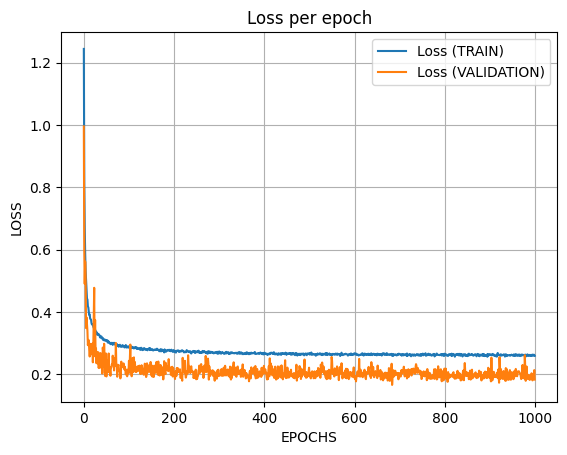

 error  of the model : 19.40%


In [32]:
plt.plot(MnistHistory.history['loss'], label='Loss (TRAIN)')
plt.plot(MnistHistory.history['val_loss'], label='Loss (VALIDATION)')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.title('Loss per epoch')
plt.legend()
plt.grid()
plt.show()
print(f" error  of the model : {loss*100:.2f}%")


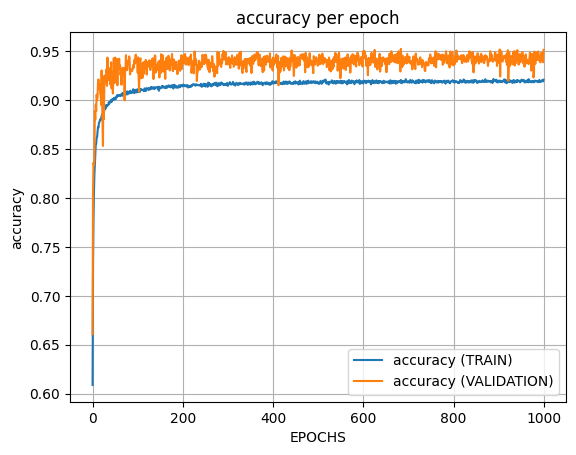

accuracy of the model : 94.46%


In [33]:
plt.plot(MnistHistory.history['accuracy'], label='accuracy (TRAIN)')
plt.plot(MnistHistory.history['val_accuracy'], label='accuracy (VALIDATION)')
plt.xlabel('EPOCHS')
plt.ylabel('accuracy')
plt.title('accuracy per epoch')
plt.legend()
plt.grid()
plt.show()

print(f"accuracy of the model : {acc*100:.2f}%")


## proceed with a class prediciton for our random sample

use a random variable to our data sample 

In [34]:
id = np.random.choice(xTestMnist.shape[0], 1000, replace=False) 


In [35]:
MnistPredictions = MnistModel.predict(xTestMnist[id[0]:id[0]+1]) # make predictions on the test set

1/1 [==============================] - 1s 674ms/step


predicted class: [3]
rial class:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


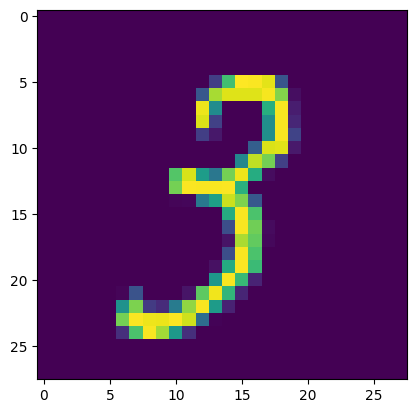

In [ ]:
predicted_class = np.argmax(MnistPredictions, axis=1) # get the predicted class by taking the index of the maximum value in the prediction array
plt.imshow(xTestMnist[id[0]])

print("predicted class:" , predicted_class)
print("rial class: ",yTestMnist[id[0]]) # display the true class of the image

predicted class: [3]
rial class:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


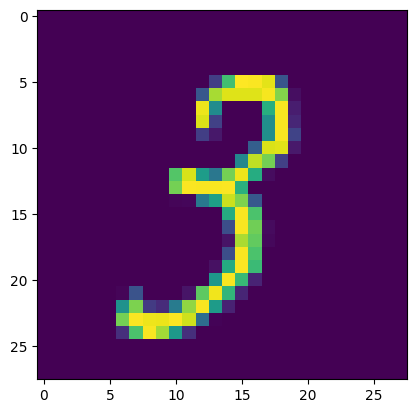

In [38]:
predicted_class = np.argmax(MnistPredictions, axis=1) # get the predicted class by taking the index of the maximum value in the prediction array
plt.imshow(xTestMnist[id[0]])

print("predicted class:" , predicted_class)
print("rial class: ",yTestMnist[id[0]]) # display the true class of the image
